## data explopring and undersatanding 

## Making the model for the prediction 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report 
import matplotlib.pyplot as plt

#selecting feature for the model prediction 
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X = df[features]
y = df['Churn']
print  (f' the selected feature are: {features}')

#filling the null values with 0 
X = X.fillna(0)

#splitting the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training model 
model = LogisticRegression()
model.fit(X_train, y_train)

#making prediction 
y_pred = model.predict(X_test)
model.fit(X_train, y_train)


#ACCURACY SCORE 
accuracy = accuracy_score(y_test, y_pred)
print(f'the accuracy of the model is: {accuracy}')

#predicting nthe probality 
df['predicted_churn_prob'] = model.predict_proba(X)[:,1] #probality of leaving 
df['servival_prob'] =  1 - df['predicted_churn_prob']#probabilty of staying

#LTV = Monthly Charge × (1 / Churn Rate) × Discount Factor
#df['estimated_LTV'] = df['MonthlyCharges']* (1 / df['predicted_churn_prob'])* 0.8 (not giving proper values )
def calculate_realistic_ltv(monthly_charge , churn_prob , max_month = 60):
    
    expected_month = min(1 / churn_prob, max_month )
    discount_factor = 0.95
    ltv = monthly_charge * expected_month * discount_factor 
    return ltv
df['realistic_LTV'] = df.apply(
    lambda row : calculate_realistic_ltv(row['MonthlyCharges'], row['predicted_churn_prob']),
    axis = 1
)
print('Top 10 customer by estimated_LTV')
print (df[['customerID', "MonthlyCharges" , 'servival_prob','realistic_LTV' ]].sort_values('realistic_LTV', ascending = False ).head(10))
#checking churn proibabilty 
print ('churn probabilty rates:')
print (df['predicted_churn_prob'].describe())
#churn which is <5% 
low_risk = df[df['predicted_churn_prob']< 0.05]
print (f'customer eith <5% churn probability is : {len(low_risk)} ({len(low_risk)/ len(df):.1%})')
actual_churn_rate = df['Churn'].mean()
print(f"Actual churn rate in data: {actual_churn_rate:.1%}")


 the selected feature are: ['tenure', 'MonthlyCharges', 'TotalCharges']
the accuracy of the model is: 0.7977288857345636
Top 10 customer by estimated_LTV
      customerID  MonthlyCharges  servival_prob  realistic_LTV
6940  2314-TNDJQ           55.65       0.983029    3115.099731
6424  6034-ZRYCV           54.20       0.983611    3089.400000
786   4992-LTJNE           55.30       0.982981    3086.807026
2541  0739-UUAJR           53.80       0.983770    3066.600000
6661  3704-IEAXF           53.65       0.984178    3058.050000
206   6348-SNFUS           55.45       0.982483    3007.140264
3683  7688-AWMDX           54.50       0.982742    3000.005790
5014  3528-HFRIQ           52.30       0.983836    2981.100000
2899  6164-HAQTX           53.95       0.982778    2976.051457
3133  3181-VTHOE           51.05       0.983668    2909.850000
churn probabilty rates:
count    7043.000000
mean        0.265938
std         0.210754
min         0.004232
25%         0.085389
50%         0.212618
75%

## Random Forest 

preparing the data for the Random Forest model
contract types : 
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
=> the the contarct values has been changed to numarics for the model
=> feature are updated and loaded
=> the data is splitted 
=> model loaded 
The accuracy of this model is  78.00%
Important Features are                 features   importance
2             TotalCharges    0.311916
1           MonthlyCharges    0.306839
0                   tenure    0.191863
3         contract_encoded    0.096638
5     techservices_encoded    0.047944
4  internetservice_encoded    0.044799
Zero churn probabilities: 0
Top 10 customer by estimated_LTV
      customerID  MonthlyCharges  servival_prob2  realistic_LTV2
4155  6904-JLBGY          117.35            1.00         6688.95
2368  6650-BWFRT          117.15            1.00         6677.55
5347  9788-HNGUT          116.95            1.00         6666.15
2025  1488-PBLJN          116.8

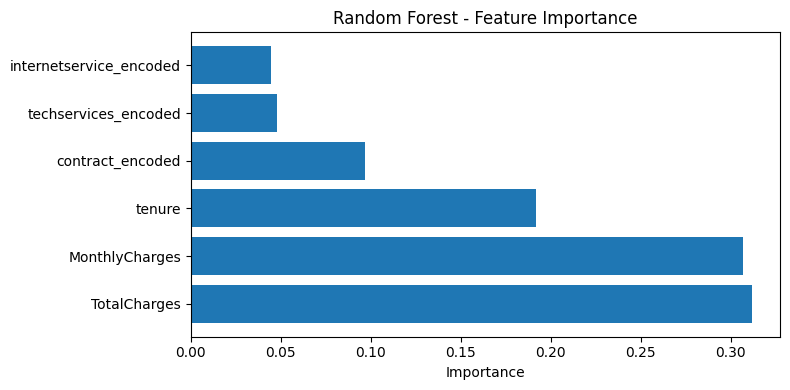


 Random Forest Results:
Accuracy: 78.0%
Best Feature: TotalCharges


In [ ]:
print ('preparing the data for the Random Forest model')
#adding more features for the model accurancy 
print ('contract types : ')
print (df['Contract'].value_counts())
# converting the values to numirical where the month to month have the highest risk 
contract_map = {'Month-to-month' : 2 , 'One year': 1, 'Two year': 0}
df['contract_encoded'] = df['Contract'].map(contract_map)
features = ['tenure', 'MonthlyCharges', 'TotalCharges','contract_encoded']
print("=> the the contarct values has been changed to numarics for the model")

#making feature of the internet type (fiber optic have more issues and more churn risk as well )
internet_map = {'No': 0, 'DSL':1 , 'Fiber optic': 2}
df['internetservice_encoded'] = df['InternetService'].map(internet_map)

tech_map= {'no internet service': 0, 'No': 1 , 'yes': 2}
df['techservices_encoded']= df['TechSupport'].map(tech_map)

features = ['tenure', 'MonthlyCharges', 'TotalCharges','contract_encoded', 
    'internetservice_encoded', 'techservices_encoded']

print ('=> feature are updated and loaded')

#applkying the random forest model 
from sklearn.ensemble import RandomForestClassifier

X = df[features].fillna(0)
Y = df['Churn']

#splitting data for the random forest
X_train,X_test , Y_train, Y_test =train_test_split (X,y, test_size = 0.2 , random_state = 42)
print ("=> the data is splitted ")
rf_model = RandomForestClassifier(n_estimators = 100, random_state=42)
rf_model.fit(X_train, Y_train)
print ('=> model loaded ')
#making predection 
y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_pred, Y_test )
print (f'The accuracy of this model is {rf_accuracy: .2%}')
#getting probabilities 
df['predicted_churn_prob2'] = rf_model.predict_proba(X)[: , 1]
df['servival_prob2']= 1  - df['predicted_churn_prob2']

#printing the feature importance
feature_importance = pd.DataFrame({
    'features ' : features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending= False )
print (f'Important Features are{feature_importance}')
# Replace zero probabilities with small value
df['predicted_churn_prob2'] = df['predicted_churn_prob2'].replace(0, 0.001)
print(f"Zero churn probabilities: {(df['predicted_churn_prob2'] == 0).sum()}")
df['realistic_LTV2'] = df.apply(
    lambda row : calculate_realistic_ltv(row['MonthlyCharges'], row['predicted_churn_prob2']),
    axis = 1
)
print('Top 10 customer by estimated_LTV')
print (df[['customerID', "MonthlyCharges" , 'servival_prob2','realistic_LTV2' ]].sort_values('realistic_LTV2', ascending = False ).head(10))
perfect_servival = df[df['servival_prob2']== 1.00]
print (f'customer with the 100% servival : {len(perfect_servival)}')
print (perfect_servival[['tenure', 'Contract', 'TotalCharges']].describe())
print ('The Random Forest is overfitting ')

# Random Forest Visualization

plt.figure(figsize=(8,4))
plt.barh(feature_importance['features '], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Random Forest - Feature Importance')
plt.tight_layout()
plt.show()

# Model Results
print(f"\n Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.1%}")
print(f"Best Feature: {feature_importance.iloc[0]['features ']}")

## Applying the XGboost model

The accuracy of the XGBoost model is  80.62%
The 100% servival customer are : 0
The accuracy of the model is 80% which is good from ohte model 
 top 10 customers (XGboost): 
      customerID  MonthlyCharges  servival_prob3  realistic_LTV3
4586  7569-NMZYQ          118.75        0.986115         6768.75
6118  9924-JPRMC          118.20        0.986115         6737.40
3205  3810-DVDQQ          117.60        0.986115         6703.20
6768  9739-JLPQJ          117.50        0.986115         6697.50
4155  6904-JLBGY          117.35        0.986115         6688.95
2368  6650-BWFRT          117.15        0.986115         6677.55
5347  9788-HNGUT          116.95        0.986115         6666.15
2025  1488-PBLJN          116.85        0.986115         6660.45
4206  0017-IUDMW          116.80        0.986115         6657.60
2689  8628-MFKAX          116.75        0.986115         6654.75
The LTV is incorrect in the xgboost 
applying the new formula because each monthly payment should be discounted

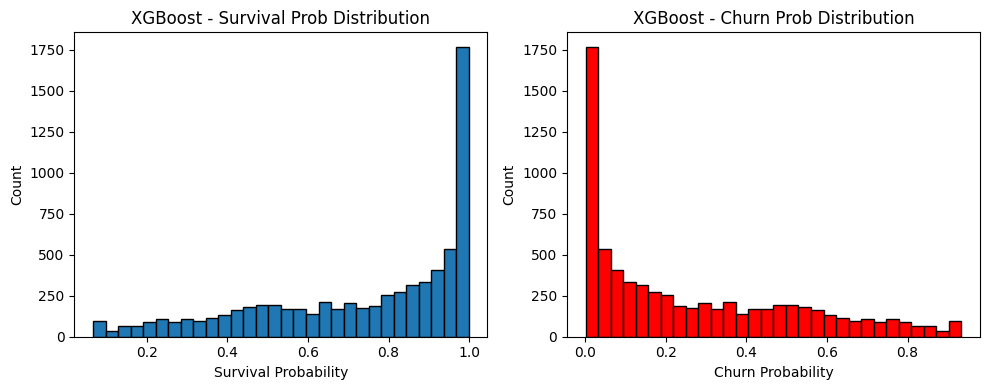


XGBoost Results:
Accuracy: 80.6%
Unique probabilities: 6055


In [36]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=100,
    random_state=42,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    )
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred)
print (f'The accuracy of the XGBoost model is {xgb_accuracy: .2%}')

#getting probabilities 
df['predicted_churn_prob3'] = xgb_model.predict_proba(X)[: , 1]
df['servival_prob3'] = 1 - df['predicted_churn_prob3']

#print the 100% servival
print (f'The 100% servival customer are : {len(df[df["servival_prob3"] == 1.00])}')
#the accuracy of the model is good 
print ('The accuracy of the model is 80% which is good from ohte model ')
# re calculating the LTV
df['realistic_LTV3'] = df.apply(
    lambda row : calculate_realistic_ltv(row['MonthlyCharges'], row['predicted_churn_prob3']), axis= 1
)
print (' top 10 customers (XGboost): ')
print (df[['customerID', 'MonthlyCharges', 'servival_prob3', "realistic_LTV3"]]
    .sort_values('realistic_LTV3', ascending = False  ).head(10))

print ('The LTV is incorrect in the xgboost ')
print ('applying the new formula because each monthly payment should be discounted separatly ')

def final_ltv(monthly, survival_prob, max_months=30):
    # Convert to monthly churn
    churn_rate = 1 - survival_prob
    churn_rate = max(churn_rate, 0.01)  # Min 1% churn
    
    # Lifetime in months 
    lifetime = min(1 / churn_rate, max_months)
    
    # 10% annual discount = 0.83% monthly
    discount_rate = 0.0083
    
    # Sum discounted future payments
    ltv = 0
    for month in range(1, int(lifetime) + 1):
        discounted = monthly / ((1 + discount_rate) ** month)
        ltv += discounted
    
    return round(ltv, 2)

df['final_LTV'] = df.apply(
    lambda row: final_ltv(row['MonthlyCharges'], row['servival_prob3']),
    axis=1
)
print (' top 10 customers (XGboost): ')
print (df[['customerID', 'MonthlyCharges', 'servival_prob3', "final_LTV"]]
    .sort_values('final_LTV', ascending = False  ).head(10))

print(f"\nLTV Statistics:")
print(f"Average LTV: ${df['final_LTV'].mean():.2f}")
print(f"Max LTV: ${df['final_LTV'].max():.2f}")
print(f"Min LTV: ${df['final_LTV'].min():.2f}")

# XGBoost Visualization
# Probability Distribution
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(df['servival_prob3'], bins=30, edgecolor='black')
plt.xlabel('Survival Probability')
plt.ylabel('Count')
plt.title('XGBoost - Survival Prob Distribution')

plt.subplot(1,2,2)
plt.hist(df['predicted_churn_prob3'], bins=30, edgecolor='black', color='red')
plt.xlabel('Churn Probability')
plt.ylabel('Count')
plt.title('XGBoost - Churn Prob Distribution')

plt.tight_layout()
plt.show()

# 2. Model Results
print(f"\nXGBoost Results:")
print(f"Accuracy: {xgb_accuracy:.1%}")
print(f"Unique probabilities: {df['servival_prob3'].nunique()}")


## Comparision of the models 


MODEL COMPARISON
----------------------------------------
Logistic Regression  79.8%
Random Forest        78.0%
XGBoost              80.6%
----------------------------------------
Best Model: XGBoost (80.6%)


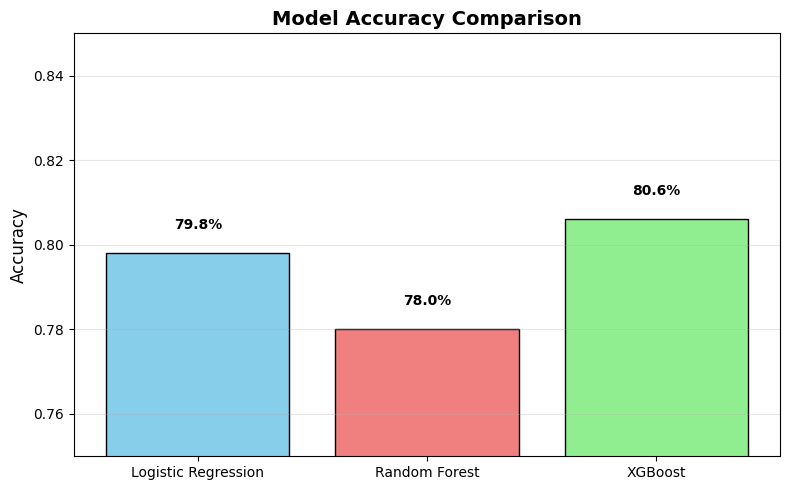

In [40]:
# MODEL COMPARISON
models = {
    'Logistic Regression': 0.798,
    'Random Forest': 0.780,
    'XGBoost': 0.806
}

# Comparison table
print("MODEL COMPARISON")
print("-" * 40)
for model, acc in models.items():
    print(f"{model:20} {acc:.1%}")
print("-" * 40)
print(f"Best Model: XGBoost ({max(models.values()):.1%})")

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
colors = ['skyblue', 'lightcoral', 'lightgreen']
bars = plt.bar(models.keys(), models.values(), color=colors, edgecolor='black')

# Add values on bars
for bar, acc in zip(bars, models.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{acc:.1%}', ha='center', va='bottom', fontweight='bold')

plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.75, 0.85)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()